# 1. Introduction

## Overview

### This project aims to analyze data from ShopSmart Inc.'s website to understand customer behavior and preferences. This involves segmenting customers by preferences, location, and purchasing habits. Insights gained will inform improvements to website usability and user experience. Additionally, the project seeks to optimize product offerings and marketing strategies to enhance customer satisfaction and retention.

## Data source

### Data for the project will be sourced from ShopSmart Inc.'s website, encompassing customer IDs, device IDs, transaction details, product information, and timestamps of customer interactions.

## Questions to be answered

### The following below are the expected questions to be answered

### a. Visit Frequency:
How often does this customer visit the website, based on the provided data?
Can you identify any patterns or trends in the customer's visit frequency?
### b. Location Analysis:
What is the customer's location based on the provided data?
How might the customer's location influence their purchasing behavior?
### c. Overall Purchase Behavior:
Based on the data provided, what insights can you draw about this customer's
overall behavior on the website?
How might these insights inform marketing strategies or personalized
recommendations for this customer?

### Importing libraries for the Analysis

In [10]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'darkgrid')

import geopandas as gpd #for displaying maps
from datetime import datetime #for datetime analysis
from IPython.display import Markdown, display # for markdown function
def printmd(string):
    display(Markdown(string))
import json # to extract the event type on the event data column since it's in a dictionary format

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# configurations

# padding value
left_padding = 21
# seed value
SEED = 42

# 2.  Data Collection and display

In [12]:
# loading in the different datasets and displaying
customers = pd.read_csv (r"C:\Users\USER\Desktop\ALt School\Semester 2\Personal Project\customers.csv")
events = pd.read_csv(r"C:\Users\USER\Desktop\ALt School\Semester 2\Personal Project\events.csv")
line_items = pd.read_csv(r"C:\Users\USER\Desktop\ALt School\Semester 2\Personal Project\line_items.csv")
orders = pd.read_csv(r"C:\Users\USER\Desktop\ALt School\Semester 2\Personal Project\orders.csv")
products = pd.read_csv(r"C:\Users\USER\Desktop\ALt School\Semester 2\Personal Project\products.csv")

In [13]:
display(customers.head())
display(events.head())
display(line_items.head())
display(orders.head())
display(products.head())

,customer_id,device_id,location,currency
0,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,ef424b22-2393-4708-b065-c68152e8b377,Oman,USD
1,5cc88463-6a08-48b5-977c-9683a1c607b2,ba53d790-0cfc-4c00-9ab7-a6b104dceb65,United States of America,GBP
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN
3,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,428688d6-31e6-4c73-a5d0-c8e849ccf6a3,Djibouti,NGN
4,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,1e939baf-c71d-444d-a832-d7dc3a6fcd0d,Guinea-Bissau,GBP


,event_id,customer_id,event_data,event_timestamp
0,14753,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-21T12:47:11.012084"", ""e...",2024-03-21 12:47:11.012084
1,14754,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-27T11:35:50.208930"", ""e...",2024-03-27 11:35:50.208930
2,14755,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""timestamp"": ""2024-03-30T04:03:10.392205"", ""e...",2024-03-30 04:03:10.392205
3,14756,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 12, ""quantity"": 5, ""timestamp"": ""2...",2024-03-30 04:03:10.394393
4,14757,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,"{""item_id"": 11, ""quantity"": 1, ""timestamp"": ""2...",2024-03-30 04:03:10.394398


,line_item_id,order_id,item_id,quantity
0,3201,9e950ce3-2e12-479c-a051-493c1a497d49,4,2
1,3202,9e950ce3-2e12-479c-a051-493c1a497d49,5,4
2,3203,9e950ce3-2e12-479c-a051-493c1a497d49,9,5
3,3204,9e950ce3-2e12-479c-a051-493c1a497d49,12,1
4,3205,9e950ce3-2e12-479c-a051-493c1a497d49,6,2


,order_id,customer_id,status,checked_out_at
0,5e57de16-d33c-4126-bf0b-da65449cc3d1,4f4f5adc-1ca2-4b49-bac4-7b12d6d9d5cf,cancelled,2024-03-30 04:12:10.394413
1,62a67177-1d7f-44fe-86f8-622686d68f69,5cc88463-6a08-48b5-977c-9683a1c607b2,cancelled,2024-03-30 04:15:10.403885
2,9e950ce3-2e12-479c-a051-493c1a497d49,cda7bec0-7cbf-4145-baf9-e049bab94504,success,2024-03-30 04:19:10.406794
3,cddddfea-27ef-437f-817d-8f849d604c3c,e7f07fd1-05af-494a-ae5a-78c405b6f9c3,failed,2024-03-30 04:09:10.411149
4,170a66c8-6b39-468c-935c-445eb6be9fdf,873618f1-c201-4f8c-94bc-4cfc3d6d8cc8,cancelled,2024-03-30 04:09:10.412870


,id,name,price
0,1,iPhone 13,1099.99
1,2,Samsung Galaxy S21,899.99
2,3,Sony PlayStation 5,499.99
3,4,Microsoft Xbox Series X,499.99
4,5,Nike Air Max 270,129.99


# 3. Data Wrangling & cleaning

## Merging the datasets to become a single dataset for ease of usage

In [16]:
# Merging the customers, events table together.These are being merged together because customer id is a common column among them

products = products.rename(columns={'id': 'item_id'}) # renaming the id to item_id 

df = pd.merge(customers, events, on = 'customer_id').merge( orders, on = 'customer_id').merge( line_items, on = 'order_id').merge( products, on = 'item_id')
df.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",2024-03-30 04:03:10.406561,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",2024-03-30 04:03:10.406769,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99


In [17]:
# creating a copy of my merged dataset
inc_merge = df.copy()
inc_merge.head()

,customer_id,device_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,item_id,quantity,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
2,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14788,"{""timestamp"": ""2024-03-30T04:03:10.406559"", ""e...",2024-03-30 04:03:10.406559,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
3,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14789,"{""timestamp"": ""2024-03-30T04:03:10.406561"", ""e...",2024-03-30 04:03:10.406561,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99
4,cda7bec0-7cbf-4145-baf9-e049bab94504,33b485de-7338-4997-b1d0-b988ba17b245,Saint Helena,NGN,14790,"{""item_id"": 4, ""quantity"": 2, ""timestamp"": ""20...",2024-03-30 04:03:10.406769,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,4,2,Microsoft Xbox Series X,499.99


#### checking for null values 

In [19]:
# checking for the no of null values in the dataset
print(inc_merge.isna().sum())
print(f'There are no missing value in the dataset')

customer_id        0
device_id          0
location           0
currency           0
event_id           0
event_data         0
event_timestamp    0
order_id           0
status             0
checked_out_at     0
line_item_id       0
item_id            0
quantity           0
name               0
price              0
dtype: int64
There are no missing value in the dataset


#### checking for the no of columns and rows present

In [21]:
# checking for the no of columns and rows present
print(inc_merge.shape)
print(f'There are {inc_merge.shape[0]} observations and {inc_merge.shape[1]} features in the dataset')

(578320, 15)
There are 578320 observations and 15 features in the dataset


#### checking the various data types of the features

In [23]:
# checking the various data types of the features
inc_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      578320 non-null  object 
 1   device_id        578320 non-null  object 
 2   location         578320 non-null  object 
 3   currency         578320 non-null  object 
 4   event_id         578320 non-null  int64  
 5   event_data       578320 non-null  object 
 6   event_timestamp  578320 non-null  object 
 7   order_id         578320 non-null  object 
 8   status           578320 non-null  object 
 9   checked_out_at   578320 non-null  object 
 10  line_item_id     578320 non-null  int64  
 11  item_id          578320 non-null  int64  
 12  quantity         578320 non-null  int64  
 13  name             578320 non-null  object 
 14  price            578320 non-null  float64
dtypes: float64(1), int64(4), object(10)
memory usage: 66.2+ MB


#### checking the various data types of the features

In [25]:
print(inc_merge.duplicated().sum())
print(f'No duplicates found')

0
No duplicates found


In [26]:
print(inc_merge.customer_id.nunique())

print('4594 unique customers are present in the dataset')

4594
4594 unique customers are present in the dataset


#### checking for the number of unique features across the dataset

In [28]:
# checking for the number of unique features across the dataset
for feature in inc_merge.columns:
    features = inc_merge[feature].nunique()
    print(feature.ljust(left_padding), features)

customer_id           4594
device_id             4594
location              243
currency              3
event_id              72570
event_data            71881
event_timestamp       70287
order_id              4594
status                3
checked_out_at        4594
line_item_id          31741
item_id               15
quantity              5
name                  15
price                 14


#### Dropping duplicate and redundant columns

In [30]:
# dropping duplicate and redundant columns
inc_merge.drop(['item_id', 'device_id'], axis=1, inplace=True)

In [31]:
inc_merge.head(2)

,customer_id,location,currency,event_id,event_data,event_timestamp,order_id,status,checked_out_at,line_item_id,quantity,name,price
0,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14786,"{""timestamp"": ""2024-03-26T22:05:58.863661"", ""e...",2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,2,Microsoft Xbox Series X,499.99
1,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14787,"{""timestamp"": ""2024-03-27T07:14:33.987347"", ""e...",2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,2,Microsoft Xbox Series X,499.99


#### converting the data type of event_timestamp and checked_out_at to datetime

In [33]:
# converting the data type of event_timestamp and checked_out_at to datetime
from datetime import datetime

inc_merge['event_timestamp'] = pd.to_datetime(inc_merge['event_timestamp'])

inc_merge['checked_out_at'] = pd.to_datetime(inc_merge['checked_out_at'])

In [34]:
inc_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578320 entries, 0 to 578319
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      578320 non-null  object        
 1   location         578320 non-null  object        
 2   currency         578320 non-null  object        
 3   event_id         578320 non-null  int64         
 4   event_data       578320 non-null  object        
 5   event_timestamp  578320 non-null  datetime64[ns]
 6   order_id         578320 non-null  object        
 7   status           578320 non-null  object        
 8   checked_out_at   578320 non-null  datetime64[ns]
 9   line_item_id     578320 non-null  int64         
 10  quantity         578320 non-null  int64         
 11  name             578320 non-null  object        
 12  price            578320 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(7)
memory usage: 57.4+ 

In [35]:
# Looking at the various product name in the datasets
# This code below checks for the number of unique products that is present in the dataset
print(inc_merge.name.nunique())
print(f'{inc_merge.name.nunique()} unique products are present in the dataset')
print('\n')
# The various name of the various products available
print(inc_merge.name.unique())

15
15 unique products are present in the dataset


['Microsoft Xbox Series X' 'Nike Air Max 270' 'Nintendo Switch'
 'Coca-Cola 12-Pack' 'Adidas Ultraboost' 'Canon EOS R5 Camera'
 'Starbucks Coffee Beans' 'Fitbit Charge 4' 'Sony WH-1000XM4 Headphones'
 'iPhone 13' 'Dell XPS 13 Laptop' 'Samsung Galaxy S21'
 'Samsung 55-Inch 4K Smart TV' 'Apple AirPods Pro' 'Sony PlayStation 5']


In [36]:
inc_merge.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
customer_id,578320,4594,eb7dcb88-073d-403e-bdd4-1e5725fe2338,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,578320,243,Korea,6997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,578320,3,USD,198037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event_id,578320.0,NaN,NaN,NaN,88235.379821,14786.0,51318.0,88373.0,125003.0,161960.0,42541.874688
event_data,578320,71881,"{""timestamp"": ""2024-03-30T04:03:10.735102"", ""e...",24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event_timestamp,578320,NaN,NaN,NaN,2024-03-29 16:11:03.894526208,2024-03-19 04:06:12.469246,2024-03-30 04:03:11.958861056,2024-03-30 04:03:14.210292992,2024-03-30 04:03:16.415859968,2024-03-30 04:20:18.189028,NaN
order_id,578320,4594,5cc9c814-c69a-4831-9b50-92abe2c1dea2,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,578320,3,failed,196383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
checked_out_at,578320,NaN,NaN,NaN,2024-03-30 04:13:21.897222144,2024-03-30 04:06:10.418189,2024-03-30 04:09:18.190401024,2024-03-30 04:13:14.665747968,2024-03-30 04:17:14.312209920,2024-03-30 04:20:18.189028,NaN
line_item_id,578320.0,NaN,NaN,NaN,19034.44488,3201.0,11108.0,19067.0,26960.0,34941.0,9153.541683


# 4. Engineering the events data

#### Additional columns were being added for better insight into customer behaviour and purshasing habit. Columns added include order_amount, event type. Event type probes into the activities of customer's on the website

In [39]:
inc_merge.event_data[4]

'{"item_id": 4, "quantity": 2, "timestamp": "2024-03-30T04:03:10.406769", "event_type": "add_to_cart"}'

In [40]:
# creating a variable for the cleaned data 
df_clean = inc_merge.copy()

In [41]:
# extracting the event_type column from the event_data

df_clean['event_type'] = df_clean['event_data'].apply(lambda x: json.loads(x)['event_type']) 
df_clean.drop('event_data', axis = 1, inplace = True) # event data column is being dropped as it makes the dataset redundant

In [42]:
df_clean.head(2)

,customer_id,location,currency,event_id,event_timestamp,order_id,status,checked_out_at,line_item_id,quantity,name,price,event_type
0,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14786,2024-03-26 22:05:58.863661,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,2,Microsoft Xbox Series X,499.99,visit
1,cda7bec0-7cbf-4145-baf9-e049bab94504,Saint Helena,NGN,14787,2024-03-27 07:14:33.987347,9e950ce3-2e12-479c-a051-493c1a497d49,success,2024-03-30 04:19:10.406794,3201,2,Microsoft Xbox Series X,499.99,visit


In [43]:
# formating the customer and order id columns for better analysis
df_clean.customer_id = df_clean['customer_id'].apply(lambda x: x.split("-")[0])
df_clean.order_id = df_clean['order_id'].apply(lambda x: x.split("-")[0])

In [44]:
df_clean.head(2)

,customer_id,location,currency,event_id,event_timestamp,order_id,status,checked_out_at,line_item_id,quantity,name,price,event_type
0,cda7bec0,Saint Helena,NGN,14786,2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3201,2,Microsoft Xbox Series X,499.99,visit
1,cda7bec0,Saint Helena,NGN,14787,2024-03-27 07:14:33.987347,9e950ce3,success,2024-03-30 04:19:10.406794,3201,2,Microsoft Xbox Series X,499.99,visit


In [45]:
# creating the order_amount column
df_clean['order_amount'] = df_clean['quantity'] * df_clean['price']

# renaming the name column to product name
df_clean = df_clean.rename( columns = {'name' : 'product_name'})

In [46]:
# drop the currency column as it is redundant
df_clean.drop('currency', axis = 1, inplace = True)

In [47]:
df_clean.columns

Index(['customer_id', 'location', 'event_id', 'event_timestamp', 'order_id',
       'status', 'checked_out_at', 'line_item_id', 'quantity', 'product_name',
       'price', 'event_type', 'order_amount'],
      dtype='object')

In [48]:
# rearranging the columns in the dataset
df_clean = df_clean.reindex(columns = ['customer_id', 'location', 'event_id', 'event_type', 'event_timestamp',
       'order_id', 'status', 'checked_out_at', 'line_item_id',
       'product_name', 'quantity', 'price', 'order_amount'])

In [49]:
df_clean.head(1)

,customer_id,location,event_id,event_type,event_timestamp,order_id,status,checked_out_at,line_item_id,product_name,quantity,price,order_amount
0,cda7bec0,Saint Helena,14786,visit,2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98


In [50]:
# creating a copy of the dataset 
inc_df = df_clean.copy()

In [51]:
inc_df.head()

,customer_id,location,event_id,event_type,event_timestamp,order_id,status,checked_out_at,line_item_id,product_name,quantity,price,order_amount
0,cda7bec0,Saint Helena,14786,visit,2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98
1,cda7bec0,Saint Helena,14787,visit,2024-03-27 07:14:33.987347,9e950ce3,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98
2,cda7bec0,Saint Helena,14788,visit,2024-03-30 04:03:10.406559,9e950ce3,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98
3,cda7bec0,Saint Helena,14789,visit,2024-03-30 04:03:10.406561,9e950ce3,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98
4,cda7bec0,Saint Helena,14790,add_to_cart,2024-03-30 04:03:10.406769,9e950ce3,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98


#### Time Analysis

In [53]:
# Creating the checkin and checkout date
checkin_date = inc_df.event_timestamp.dt.date
checkout_date = inc_df.checked_out_at.dt.date

# Extract day of week
checkin_day = inc_df.event_timestamp.dt.strftime('%A')
checkout_day = inc_df.checked_out_at.dt.strftime('%A')

# Extract time
inc_df['checkin_time'] = inc_df.event_timestamp.dt.strftime("%X")
inc_df['checkout_time'] = inc_df.checked_out_at.dt.strftime("%X")
# display(checkin_date, checkout_date)

In [54]:
 # Create a new DataFrame with the three new columns
date_columns = pd.DataFrame({'checkin_date': checkin_date, 'checkout_date':checkout_date, 'checkin_day': checkin_day,
                                'checkout_day': checkout_day})

# Concatenate the new DataFrame with the original DataFrame x
inc_df = pd.concat([inc_df, date_columns], axis=1)

In [55]:
inc_df

,customer_id,location,event_id,event_type,event_timestamp,order_id,status,checked_out_at,line_item_id,product_name,quantity,price,order_amount,checkin_time,checkout_time,checkin_date,checkout_date,checkin_day,checkout_day
0,cda7bec0,Saint Helena,14786,visit,2024-03-26 22:05:58.863661,9e950ce3,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98,22:05:58,04:19:10,2024-03-26,2024-03-30,Tuesday,Saturday
1,cda7bec0,Saint Helena,14787,visit,2024-03-27 07:14:33.987347,9e950ce3,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98,07:14:33,04:19:10,2024-03-27,2024-03-30,Wednesday,Saturday
2,cda7bec0,Saint Helena,14788,visit,2024-03-30 04:03:10.406559,9e950ce3,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98,04:03:10,04:19:10,2024-03-30,2024-03-30,Saturday,Saturday
3,cda7bec0,Saint Helena,14789,visit,2024-03-30 04:03:10.406561,9e950ce3,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98,04:03:10,04:19:10,2024-03-30,2024-03-30,Saturday,Saturday
4,cda7bec0,Saint Helena,14790,add_to_cart,2024-03-30 04:03:10.406769,9e950ce3,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98,04:03:10,04:19:10,2024-03-30,2024-03-30,Saturday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578315,3aa213f4,Liechtenstein,161946,add_to_cart,2024-03-30 04:03:18.223419,4c2defc5,cancelled,2024-03-30 04:19:18.223427,34939,Sony PlayStation 5,2,499.99,999.98,04:03:18,04:19:18,2024-03-30,2024-03-30,Saturday,Saturday
578316,3aa213f4,Liechtenstein,161947,add_to_cart,2024-03-30 04:03:18.223421,4c2defc5,cancelled,2024-03-30 04:19:18.223427,34939,Sony PlayStation 5,2,499.99,999.98,04:03:18,04:19:18,2024-03-30,2024-03-30,Saturday,Saturday
578317,3aa213f4,Liechtenstein,161948,add_to_cart,2024-03-30 04:03:18.223423,4c2defc5,cancelled,2024-03-30 04:19:18.223427,34939,Sony PlayStation 5,2,499.99,999.98,04:03:18,04:19:18,2024-03-30,2024-03-30,Saturday,Saturday
578318,3aa213f4,Liechtenstein,161949,add_to_cart,2024-03-30 04:03:18.223424,4c2defc5,cancelled,2024-03-30 04:19:18.223427,34939,Sony PlayStation 5,2,499.99,999.98,04:03:18,04:19:18,2024-03-30,2024-03-30,Saturday,Saturday


# 5. Visit Frequency

In [57]:
number_of_customers_who_visits = inc_df.customer_id.nunique()
number_of_orders = inc_df.order_id.nunique()
begining_date = inc_df.checkin_date.min()
ending_date = inc_df.checkout_date.max()
printmd(f'Shop Smart Inc has **{number_of_customers_who_visits}** customers who visit their website and **{number_of_orders}** orders beginning from **{begining_date}** to **{ending_date}**')

Shop Smart Inc has **4594** customers who visit their website and **4594** orders beginning from **2024-03-19** to **2024-03-30**

## Traffic Engagements on the Websites

### The distribution of daily visits by date and day of the week

,checkin_date,checkin_day,daily_visits
11,2024-03-30,Saturday,529929
8,2024-03-27,Wednesday,5145
9,2024-03-28,Thursday,5102
6,2024-03-25,Monday,5021
1,2024-03-20,Wednesday,4953
3,2024-03-22,Friday,4834
4,2024-03-23,Saturday,4831
5,2024-03-24,Sunday,4779
7,2024-03-26,Tuesday,4660
2,2024-03-21,Thursday,4483


From the result it can be deduced that the day of the week that has the most engagement is **Saturday**

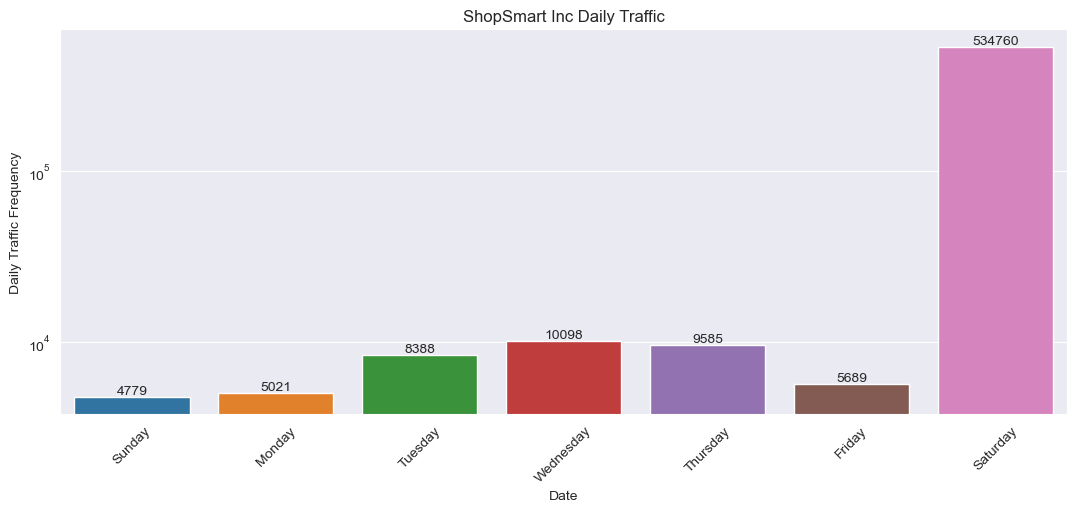

 The website has a minimum of **855** and maximum of **529929** visits with an average of **48193** daily

In [60]:
# The distribution of daily visits by date and day of the week
daily_visits_df = inc_df.groupby(['checkin_date', 'checkin_day']).size().reset_index(name='daily_visits')
display(daily_visits_df.sort_values(by = 'daily_visits', ascending = False)) # displys the daily by the checkin_day and checkin_date
print('\n')
printmd(f'From the result it can be deduced that the day of the week that has the most engagement is **Saturday**')

# Calculating average visit, min and max visits of Customers
avg_daily_visit = round(daily_visits_df['daily_visits'].mean())
min_daily =  daily_visits_df[daily_visits_df['daily_visits'] == daily_visits_df['daily_visits'].min()]
max_daily =  daily_visits_df[daily_visits_df['daily_visits'] == daily_visits_df['daily_visits'].max()]

# plotting a bar chart to show distribution of visits/Traffic across the month and showing the date that has the highest number of visits
plt.figure(figsize= (13,5))
plt.title('ShopSmart Inc Daily Traffic')
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax = sns.countplot(data= inc_df, x='checkin_day', order = day_order)
ax.bar_label(ax.containers[0]) # Assigning the values of each bar

plt.yscale('log')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Daily Traffic Frequency')
plt.show()

printmd(f' The website has a minimum of **{min_daily.daily_visits.values[0]}** and maximum of **{max_daily.daily_visits.values[0]}** visits with an average of **{avg_daily_visit}** daily')

### The distribution of daily visits by Customer

,customer_id,checkin_date,checkin_day,daily_visits
9575,e5106e11,2024-03-30,Saturday,336
9480,e3b361b9,2024-03-30,Saturday,324
7985,be8ce4e3,2024-03-30,Saturday,324
4898,70676244,2024-03-30,Saturday,324
7035,a68a4174,2024-03-30,Saturday,324
...,...,...,...,...
1420,20bde910,2024-03-23,Saturday,1
1419,20bde910,2024-03-21,Thursday,1
1418,20bde910,2024-03-19,Tuesday,1
2542,393effd8,2024-03-25,Monday,1


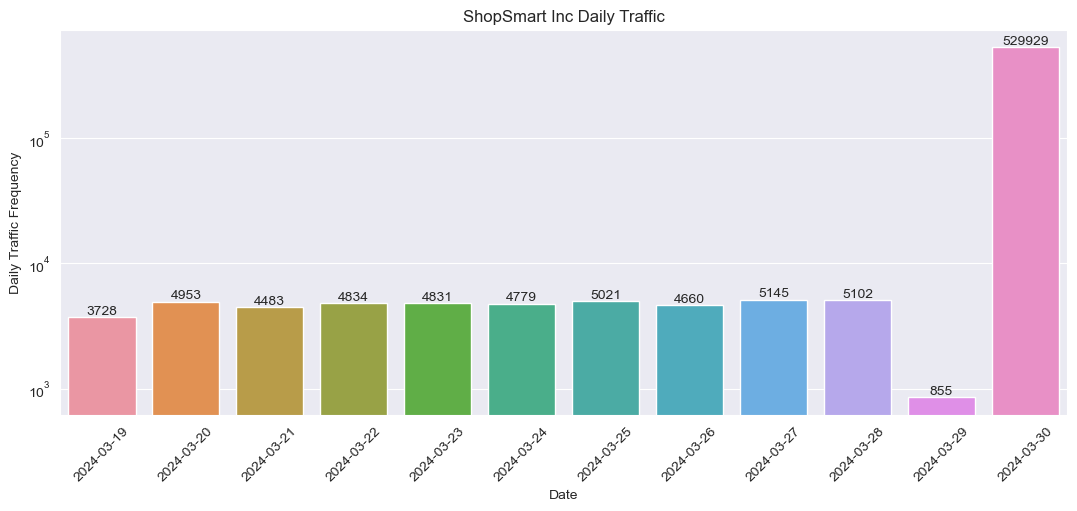

**customer Id e5106e11** has the most visit on the **30th** of the Month

 There was a relatively stable visits of customers on the website from the **2024-03-19            till 2024-03-29** then a sudden increase in traffic on the **30th**, this signifies that the website had increase in traffic on that day            which is on a **Saturday**

ShopInc website had an average customers visit of **54** and a maximum daily user of **336**

In [62]:
visits_user = inc_df.groupby(['customer_id', 'checkin_date', 'checkin_day', ]).size().reset_index(name='daily_visits')
display(visits_user.sort_values(by = 'daily_visits', ascending = False))


# Calculating average visit, min and max visits of Customers
avg_daily_visit_user = round(visits_user['daily_visits'].mean())
min_daily_user =  visits_user[visits_user.daily_visits == visits_user.daily_visits.min()]
max_daily_user =  visits_user[visits_user.daily_visits == visits_user.daily_visits.max()]

# plotting a bar chart to show distribution of visits/Traffic across the month and showing the date that has the highest number of visits
plt.figure(figsize= (13,5))
plt.title('ShopSmart Inc Daily Traffic')
ax = sns.barplot(data= daily_visits_df, x='checkin_date', y= 'daily_visits')
ax.bar_label(ax.containers[0]) # Assigning the values of each bar

plt.yscale('log')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Daily Traffic Frequency')
plt.show()

printmd(f'**customer Id e5106e11** has the most visit on the **30th** of the Month')
printmd(f' There was a relatively stable visits of customers on the website from the **2024-03-19\
            till 2024-03-29** then a sudden increase in traffic on the **30th**, this signifies that the website had increase in traffic on that day\
            which is on a **Saturday**')
printmd(f'ShopInc website had an average customers visit of **{avg_daily_visit_user}** and a maximum daily user of **{max_daily_user.daily_visits.values[0]}**')

### Distribution of activities on the Website

,event_type,count
0,add_to_cart,269335
1,visit,143154
2,remove_from_cart,134090
3,checkout,31741


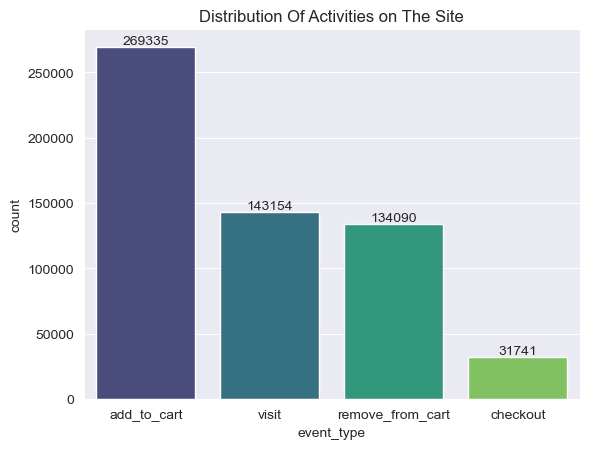

The visualization revealed the most activity on the site was **add_to_cart** with **checkout** being the least.

In [64]:
# Distribution of activities in Website
inc_event_df=inc_df['event_type'].value_counts().reset_index()
display(inc_event_df)

# plotting the data and setting the title
ax = sns.barplot(x='event_type', y='count', data=inc_event_df,  palette='viridis')
plt.title('Distribution Of Activities on The Site')

# Annotate bars
ax.bar_label(ax.containers[0]) # Assigning the values of each bar

# display the plot
plt.show()

printmd("The visualization revealed the most activity on the site was **add_to_cart** with **checkout** being the least.")

### Customer duration on the Shop_inc website in hours

In [66]:
# Customer duration on the Shop_inc website in hours
purchase_duration_df = inc_df['checked_out_at'] - inc_df['event_timestamp']
#inc_df.drop('purchase_duration', axis = 1, inplace = True)

# Convert the duration to hours
inc_df['purchase_duration_hours'] = round(purchase_duration_df.dt.total_seconds() / 3600, 2)

### Top Customers by Site Interactions

In [68]:
# Counts of visits of customers on the website
df_visit = inc_df.customer_id.value_counts().reset_index()
df_visit.columns = ['customer_id', 'visit_count']
display(df_visit)
avg_duration = round(inc_df.purchase_duration_hours.mean(),2)

printmd(f'Customer with id **{df_visit.customer_id.values[0]}** has the most site interactions with an average duration of **{avg_duration}** hours')

,customer_id,visit_count
0,eb7dcb88,372
1,a7d9058a,360
2,12e94262,360
3,ebcea232,360
4,c391f179,360
...,...,...
4589,dc9500b1,3
4590,48139381,3
4591,4e412d78,3
4592,81d65a2c,3


Customer with id **eb7dcb88** has the most site interactions with an average duration of **12.04** hours

### Customers with the Most and Least Vsit Frequency

     customer_id  count
4218    eb7dcb88    372
3422    be8ce4e3    360
4078    e4431b51    360
4227    ebcb2343    360
330     12e94262    360


     customer_id  count
3100    ac56ac35      3
3995    df882d86      3
4250    ed431735      3
3516    c3502c5a      3
4306    f054489f      3


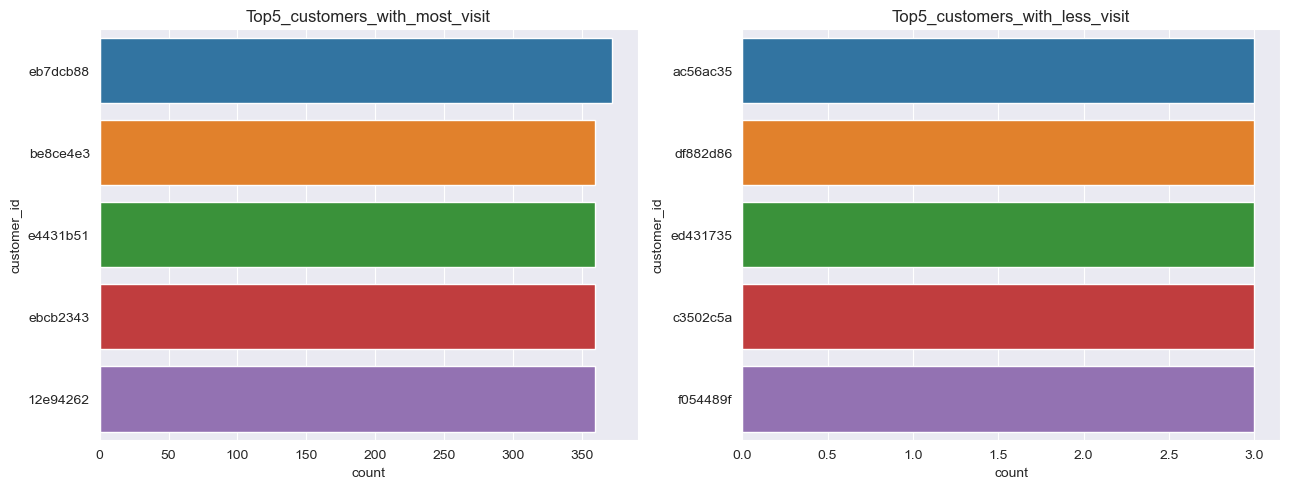

The first **4 customers** visited the websites on an average of about of about **367** times

In [70]:
# Creating a variable that displays customers that only visits
visit = inc_df.groupby('customer_id').size().reset_index(name='count').sort_values(by='count', ascending=False)

Top5_customers_with_most_visit = visit.head()
Top5_customers_with_less_visit = visit.tail()

print(Top5_customers_with_most_visit)
print('\n')
print(Top5_customers_with_less_visit)

# visualizing the results
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

# plotting the Top 5 customers with the highest visit 
sns.barplot(x='count' , y='customer_id',   data= Top5_customers_with_most_visit, ax = ax[0])
ax[0].set_title('Top5_customers_with_most_visit')

# plotting the Top 5 customers with the least visit 
sns.barplot(x='count' , y= 'customer_id',   data= Top5_customers_with_less_visit, ax = ax[1])
ax[1].set_title('Top5_customers_with_less_visit')

# Adjust layout
plt.tight_layout()
# plt.yticks(rotation=80) 
plt.show()

printmd(f'The first **4 customers** visited the websites on an average of about of about **367** times')

### Products by interaction with Websites

,product_name,count
0,Canon EOS R5 Camera,39715
1,Fitbit Charge 4,39268
2,Sony WH-1000XM4 Headphones,39162
3,Dell XPS 13 Laptop,39084
4,Samsung Galaxy S21,38997
5,iPhone 13,38866
6,Microsoft Xbox Series X,38842
7,Adidas Ultraboost,38835
8,Nike Air Max 270,38782
9,Coca-Cola 12-Pack,38440


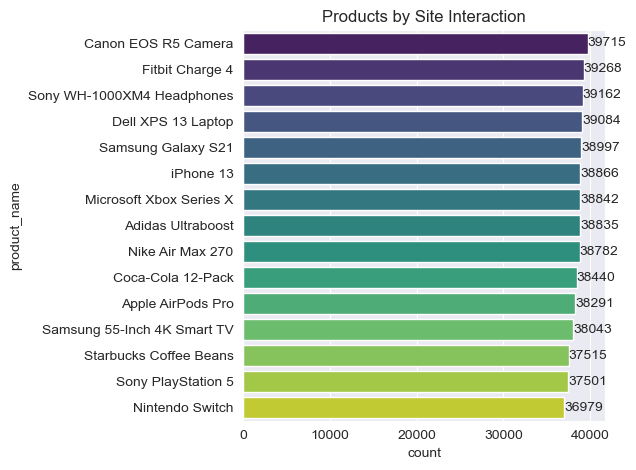

**Canon EOS R5 Camera** has the most product interactions

In [72]:
df_products = inc_df.product_name.value_counts().reset_index()
display(df_products)

# plotting the data and setting the title
ax = sns.barplot(x='count', y='product_name', data=df_products,  palette='viridis')
plt.title('Products by Site Interaction')

# Annotate bars
ax.bar_label(ax.containers[0]) # Assigning the values of each bar

# display the plot
plt.tight_layout()
plt.show()

printmd(f'**{df_products.product_name.values[0]}** has the most product interactions')

### Insights Summary

The data highlights that **Saturday** is the day with the highest customer engagement. The website recorded a minimum of 855 visits
and a maximum of 529,929 visits, with an average of 48,193 visits per day. On **March 30**, customer ID **e5106e11** had the most visits, 
contributing to the spike in traffic on that day.\
From March 19 to March 29, the customer visits were relatively stable. However, there was a notable increase in traffic on March 30, a Saturday, 
indicating that **weekends**, particularly **Saturdays**, are peak days for website traffic and customer engagement.
Shop Smart Inc’s website had an average of **54 customer** visits per day, with a maximum daily user count of **336**

In [75]:
## Successful orders includes the orders that checkout successfully
successful_orderdf = inc_df[(inc_df['status'] == 'success') & (inc_df['event_type'] == 'checkout')]

# 6. Location Analysis

## Location by customer

In [78]:
# customer location
location_data = inc_df.groupby('location').size().sort_values(ascending = False).reset_index(name = 'location_count')

display(location_data.head(10))
printmd(f'**Korea** had the most site interaction with 6997 site interaction')

,location,location_count
0,Korea,6997
1,Argentina,4507
2,Mauritius,4414
3,Jersey,4130
4,Panama,3936
5,French Guiana,3851
6,Guernsey,3804
7,Guatemala,3731
8,Albania,3721
9,Philippines,3675


**Korea** had the most site interaction with 6997 site interaction

## Top 25 location that generated the highest revenue on the Shop Inc website

,location,order_amount
0,Singapore,252274.67
1,Korea,247149.42
2,Mauritius,241841.76
3,Bosnia and Herzegovina,222098.53
4,Rwanda,217881.10
...,...,...
238,Comoros,11169.89
239,Uruguay,8513.70
240,Kyrgyz Republic,6697.77
241,Malaysia,2119.96


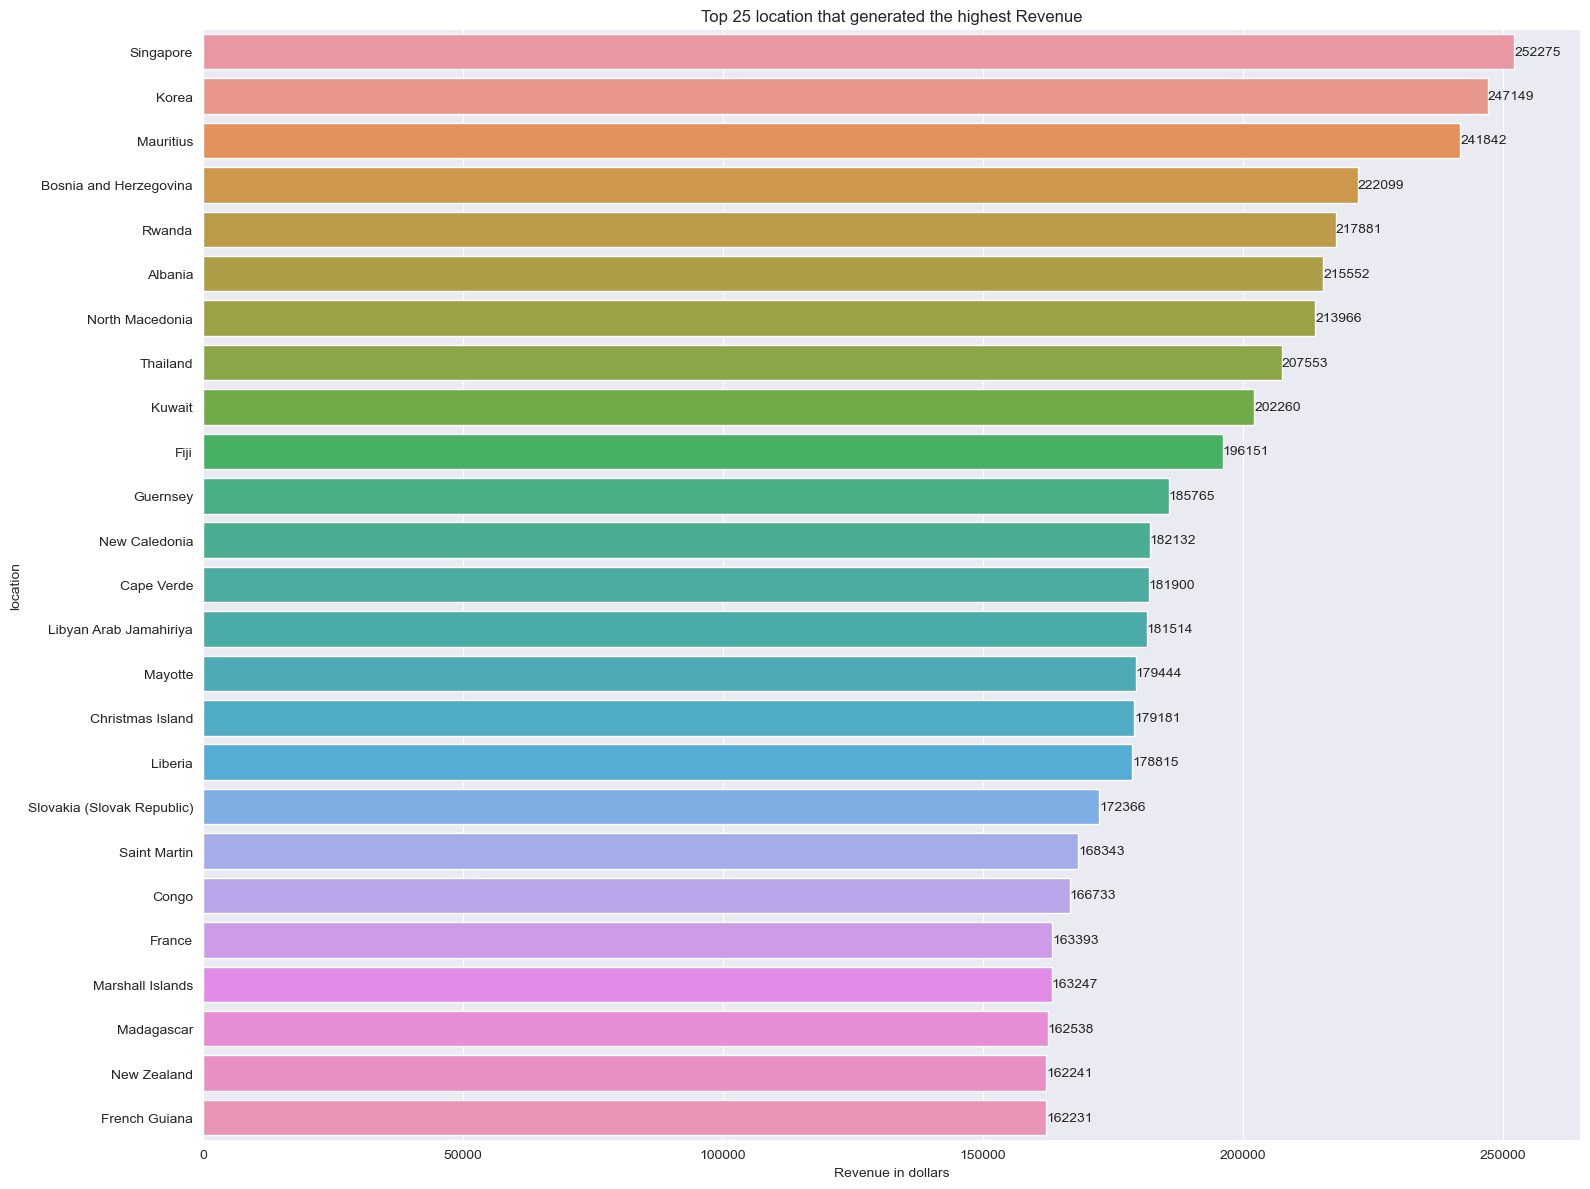

**Singapore** generated the highest revenue with a total of **252274.67** while **Slovenia** with **180.0** generated the least', **Argentina** which emerged as the second country that has the most site interactions failed to generate a substantial revenue and is not even among the top 25 countries that generated the most revenue.

In [80]:
Revenue_by_location = successful_orderdf.groupby('location')['order_amount'].sum().sort_values(ascending = False).reset_index()
display(Revenue_by_location)

# bar plot of location of site interactions
plt.figure(figsize=(16, 12))
ax = sns.barplot(Revenue_by_location.head(25),y="location",x="order_amount")

# Annotate bars
ax.bar_label(ax.containers[0]) # Assigning the values of each bar

plt.title('Top 25 location that generated the highest Revenue')
plt.xlabel('Revenue in dollars')
plt.tight_layout()
plt.show()

printmd(f"**Singapore** generated the highest revenue with a total of **{round(Revenue_by_location.order_amount.values[0],2)}** while \
**Slovenia** with **{Revenue_by_location.order_amount.values[242]}** generated the least', **Argentina** which emerged as the second \
country that has the most site interactions failed to generate a substantial revenue and is not even among the top 25 countries that generated the most revenue.")

In [81]:
# checking through items that are being purchased by customers and their behavioural pattern
successful_orderdf.head(2)

,customer_id,location,event_id,event_type,event_timestamp,order_id,status,checked_out_at,line_item_id,product_name,quantity,price,order_amount,checkin_time,checkout_time,checkin_date,checkout_date,checkin_day,checkout_day,purchase_duration_hours
13,cda7bec0,Saint Helena,14799,checkout,2024-03-30 04:19:10.406794,9e950ce3,success,2024-03-30 04:19:10.406794,3201,Microsoft Xbox Series X,2,499.99,999.98,04:19:10,04:19:10,2024-03-30,2024-03-30,Saturday,Saturday,0.0
35,11f73687,Grenada,14935,checkout,2024-03-30 04:13:10.429566,bb15e304,success,2024-03-30 04:13:10.429566,3224,Microsoft Xbox Series X,2,499.99,999.98,04:13:10,04:13:10,2024-03-30,2024-03-30,Saturday,Saturday,0.0


## Top selling products by location 

In [83]:
# Top_countries = successful_orderdf.groupby(['location', 'product_name'])['order_amount'].sum().sort_values(ascending = False).reset_index()
# display(Top_countries)

top_25_countries=list(Revenue_by_location.head(25)["location"]) #list of top 25 contries by ShopSMart revenue
top_25_countriesdf= successful_orderdf[successful_orderdf["location"].isin(top_25_countries)]#subsetting
result = top_25_countriesdf.groupby(["location", "product_name"])["order_amount"].sum()
display(result)

# Findng the item with the highest sales in each country
max_selling_item = result.groupby("location").idxmax()
display(max_selling_item)

# Extract the item names
most_sold_items = result.loc[max_selling_item]

# Display the result
display(most_sold_items.reset_index().sort_values(ascending = False, by = 'order_amount'))

printmd(f'**Rwanda** is the country that generated the highest revenue, with the product **Canon EOS R5 Camera**')

location  product_name              
Albania   Adidas Ultraboost              3420.00
          Apple AirPods Pro              7249.71
          Canon EOS R5 Camera           87999.78
          Coca-Cola 12-Pack               101.83
          Dell XPS 13 Laptop            27299.79
                                          ...   
Thailand  Samsung Galaxy S21            15299.83
          Sony PlayStation 5            12499.75
          Sony WH-1000XM4 Headphones     6999.80
          Starbucks Coffee Beans           77.94
          iPhone 13                     18699.83
Name: order_amount, Length: 374, dtype: float64

location
Albania                                          (Albania, Canon EOS R5 Camera)
Bosnia and Herzegovina            (Bosnia and Herzegovina, Canon EOS R5 Camera)
Cape Verde                                    (Cape Verde, Canon EOS R5 Camera)
Christmas Island                        (Christmas Island, Canon EOS R5 Camera)
Congo                                              (Congo, Canon EOS R5 Camera)
Fiji                                                (Fiji, Canon EOS R5 Camera)
France                                            (France, Canon EOS R5 Camera)
French Guiana                              (French Guiana, Canon EOS R5 Camera)
Guernsey                                        (Guernsey, Canon EOS R5 Camera)
Korea                                              (Korea, Canon EOS R5 Camera)
Kuwait                                            (Kuwait, Canon EOS R5 Camera)
Liberia                                          (Liberia, Canon EOS R5 Camera)
Libyan Arab Jamahiriya         

,location,product_name,order_amount
20,Rwanda,Canon EOS R5 Camera,115999.71
12,Libyan Arab Jamahiriya,Canon EOS R5 Camera,111999.72
22,Singapore,Canon EOS R5 Camera,111999.72
1,Bosnia and Herzegovina,Canon EOS R5 Camera,111999.72
19,North Macedonia,Canon EOS R5 Camera,107999.73
23,Slovakia (Slovak Republic),Canon EOS R5 Camera,95999.76
5,Fiji,Canon EOS R5 Camera,95999.76
10,Kuwait,Canon EOS R5 Camera,91999.77
8,Guernsey,Canon EOS R5 Camera,91999.77
0,Albania,Canon EOS R5 Camera,87999.78


**Rwanda** is the country that generated the highest revenue, with the product **Canon EOS R5 Camera**

### Insights Summary

**Korea** had the highest site interactions with 6997 interactions, Singapore generated the highest revenue, totaling **$252,274.67**.
**Rwanda** also stood out by generating significant revenue, particularly for the Canon EOS R5 Camera. Customer ID **bb7fd0af** from Taiwan had the highest purchase value.
Customer ID **3c8e3261** bought the highest quantity of products, totaling 49 units.

How might the customer's location influence their purchasing behavior?

Customers from **Korea** are highly interactive with the site, indicating strong engagement and potential for targeted marketing.
High revenue generation from **Singapore** suggests a market with high purchasing power, justifying personalized offers and premium product promotions.
Rwanda’s significant revenue generation for specific high-value products like the **Canon EOS R5 Camera** suggests a niche market for luxury or high-end items.
Taiwan’s customer with the highest purchase value indicates a potential market for high-spending customers who may respond well to loyalty programs and exclusive deals.

# 7. Overall Purchase Behaviour

## Top Customers by Purchase

,customer_id,order_amount
0,bb7fd0af,41417.41
1,df4cf418,41129.38
2,3c8e3261,41129.37
3,662af3bb,40451.58
4,90e76254,40249.41
...,...,...
1543,fd960258,29.95
1544,655402da,29.95
1545,2ea8d429,29.95
1546,8ef3e5a2,23.96


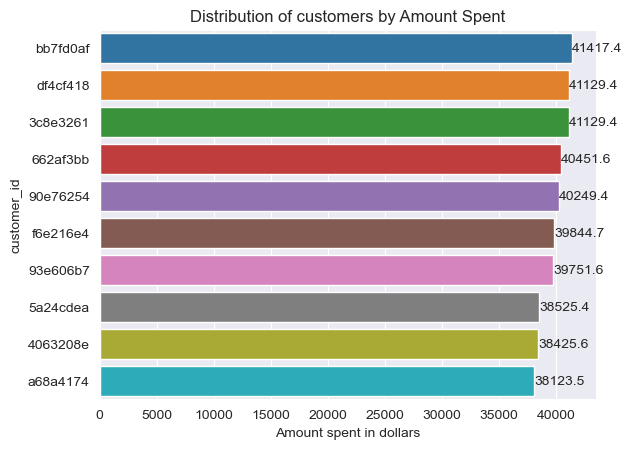

Customer id **bb7fd0af** had the highest purchase on the website, and is from Taiwan

In [88]:
amount_df = successful_orderdf.groupby('customer_id')['order_amount'].sum().sort_values(ascending = False).reset_index()
display(amount_df)
ax = sns.barplot(y ='customer_id', x='order_amount', data = amount_df.head(10))

ax.bar_label(ax.containers[0]) # Assigning the values of each bar
plt.title("Distribution of customers by Amount Spent")
plt.xlabel("Amount spent in dollars")
plt.show()

printmd(f'Customer id **bb7fd0af** had the highest purchase on the website, and is from Taiwan')

### Delving deeper into customer_id 'bb7fd0af' for his high purchase on the website

In [90]:
# delving deeper into customer_id 'bb7fd0af' for his high purchase on the website
successful_orderdf[successful_orderdf.customer_id == 'bb7fd0af'].head(10)

,customer_id,location,event_id,event_type,event_timestamp,order_id,status,checked_out_at,line_item_id,product_name,quantity,price,order_amount,checkin_time,checkout_time,checkin_date,checkout_date,checkin_day,checkout_day,purchase_duration_hours
16536,bb7fd0af,Taiwan,77067,checkout,2024-03-30 04:09:13.742352,70441ff8,success,2024-03-30 04:09:13.742352,16568,Microsoft Xbox Series X,2,499.99,999.98,04:09:13,04:09:13,2024-03-30,2024-03-30,Saturday,Saturday,0.0
55093,bb7fd0af,Taiwan,77067,checkout,2024-03-30 04:09:13.742352,70441ff8,success,2024-03-30 04:09:13.742352,16563,Nike Air Max 270,1,129.99,129.99,04:09:13,04:09:13,2024-03-30,2024-03-30,Saturday,Saturday,0.0
93223,bb7fd0af,Taiwan,77067,checkout,2024-03-30 04:09:13.742352,70441ff8,success,2024-03-30 04:09:13.742352,16565,Nintendo Switch,3,299.99,899.97,04:09:13,04:09:13,2024-03-30,2024-03-30,Saturday,Saturday,0.0
130875,bb7fd0af,Taiwan,77067,checkout,2024-03-30 04:09:13.742352,70441ff8,success,2024-03-30 04:09:13.742352,16562,Coca-Cola 12-Pack,3,5.99,17.97,04:09:13,04:09:13,2024-03-30,2024-03-30,Saturday,Saturday,0.0
169843,bb7fd0af,Taiwan,77067,checkout,2024-03-30 04:09:13.742352,70441ff8,success,2024-03-30 04:09:13.742352,16566,Adidas Ultraboost,4,180.00,720.00,04:09:13,04:09:13,2024-03-30,2024-03-30,Saturday,Saturday,0.0
208002,bb7fd0af,Taiwan,77067,checkout,2024-03-30 04:09:13.742352,70441ff8,success,2024-03-30 04:09:13.742352,16571,Canon EOS R5 Camera,5,3999.99,19999.95,04:09:13,04:09:13,2024-03-30,2024-03-30,Saturday,Saturday,0.0
286023,bb7fd0af,Taiwan,77067,checkout,2024-03-30 04:09:13.742352,70441ff8,success,2024-03-30 04:09:13.742352,16570,Fitbit Charge 4,5,149.95,749.75,04:09:13,04:09:13,2024-03-30,2024-03-30,Saturday,Saturday,0.0
364065,bb7fd0af,Taiwan,77067,checkout,2024-03-30 04:09:13.742352,70441ff8,success,2024-03-30 04:09:13.742352,16564,iPhone 13,2,1099.99,2199.98,04:09:13,04:09:13,2024-03-30,2024-03-30,Saturday,Saturday,0.0
402842,bb7fd0af,Taiwan,77067,checkout,2024-03-30 04:09:13.742352,70441ff8,success,2024-03-30 04:09:13.742352,16561,Dell XPS 13 Laptop,5,1299.99,6499.95,04:09:13,04:09:13,2024-03-30,2024-03-30,Saturday,Saturday,0.0
441974,bb7fd0af,Taiwan,77067,checkout,2024-03-30 04:09:13.742352,70441ff8,success,2024-03-30 04:09:13.742352,16572,Samsung Galaxy S21,3,899.99,2699.97,04:09:13,04:09:13,2024-03-30,2024-03-30,Saturday,Saturday,0.0


In [91]:
## customer statistics/ min, avg, and max of revenue spent on the website, histogram, boxplot
successful_orderdf
max_amount = round(successful_orderdf.order_amount.max(),0)
avg_amount = round(successful_orderdf.order_amount.mean(),0)
min_amount = round(successful_orderdf.order_amount.min(),0)
printmd(f'The maximum amount of orders on the website is **{max_amount}** with an average amount of **{avg_amount}**')

The maximum amount of orders on the website is **20000.0** with an average amount of **2133.0**

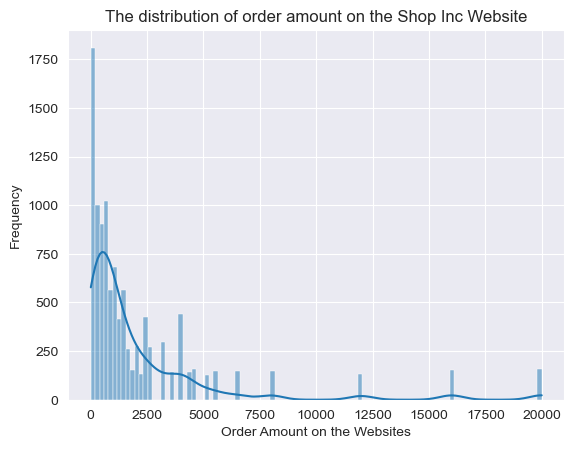

In [92]:
# create a histogram to show the distribution of revenue
sns.histplot( successful_orderdf.order_amount, kde = True)
plt.xlabel('Order Amount on the Websites')
plt.ylabel('Frequency')
plt.title('The distribution of order amount on the Shop Inc Website')
plt.show()

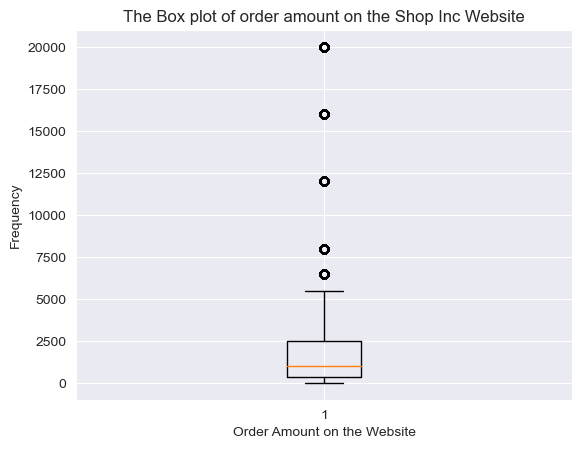

In [93]:
# plot a boxplot to show if any outliers existed and to show the concentration of data points
plt.boxplot(successful_orderdf.order_amount)
plt.xlabel('Order Amount on the Website')
plt.ylabel('Frequency')
plt.title('The Box plot of order amount on the Shop Inc Website')
plt.show()

## Top customers by quantity of product bought

,customer_id,quantity
0,3c8e3261,48
1,9d74145c,47
2,f778e747,46
3,5a24cdea,45
4,e6dd3c56,45
...,...,...
1543,eae41654,1
1544,baedd16d,1
1545,d6fa7c12,1
1546,8b67f5ea,1


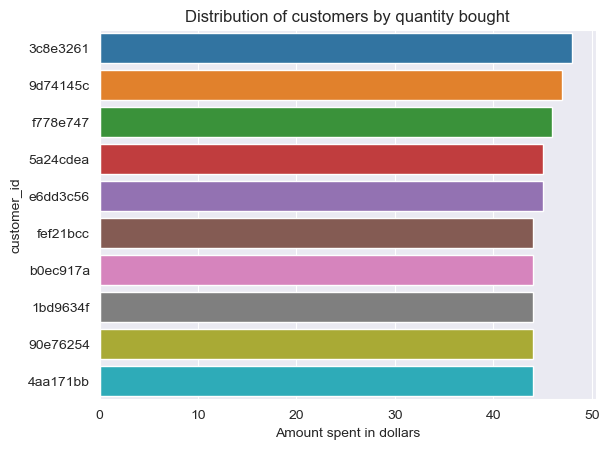

In [95]:
# Top customers by quantity of product bought
quantity_df = successful_orderdf.groupby('customer_id')['quantity'].sum().sort_values(ascending = False).reset_index()
display(quantity_df)
sns.barplot(y ='customer_id', x='quantity', data = quantity_df.head(10))
plt.title("Distribution of customers by quantity bought")
plt.xlabel("Amount spent in dollars")
plt.show()

## Top products by Revenue generated

,product_name,order_amount
0,Canon EOS R5 Camera,8923977.69
1,Dell XPS 13 Laptop,2805378.42
2,iPhone 13,2378178.38
3,Samsung Galaxy S21,1952078.31
4,Samsung 55-Inch 4K Smart TV,1674379.07
5,Microsoft Xbox Series X,1081978.36
6,Sony PlayStation 5,1055978.88
7,Sony WH-1000XM4 Headphones,745828.69
8,Nintendo Switch,567281.09
9,Apple AirPods Pro,544728.21


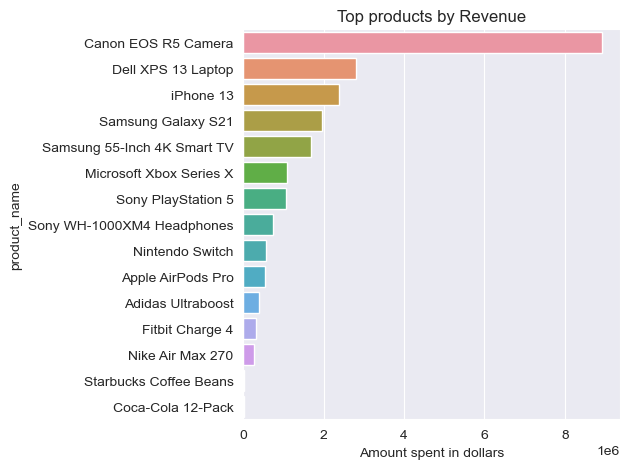

**Canon EOS R5 Camera** is the highest selling product with **8923977.69** dollars while        **Coca-Cola 12-Pack** is the least with **12722.76** dollars

In [100]:
product_revenue = successful_orderdf.groupby('product_name')['order_amount'].sum().sort_values(ascending = False).reset_index()
display(product_revenue)
sns.barplot(y ='product_name', x='order_amount', data = product_revenue)


plt.title("Top products by Revenue")
plt.xlabel("Amount spent in dollars")
plt.tight_layout()
plt.show()
printmd(f'**Canon EOS R5 Camera** is the highest selling product with **{product_revenue.order_amount.values[0]}** dollars while\
        **Coca-Cola 12-Pack** is the least with **12722.76** dollars')
            

## Top products by Quantity

,product_name,quantity
0,Canon EOS R5 Camera,2231
1,Apple AirPods Pro,2179
2,Adidas Ultraboost,2178
3,Samsung Galaxy S21,2169
4,Microsoft Xbox Series X,2164
5,iPhone 13,2162
6,Dell XPS 13 Laptop,2158
7,Nike Air Max 270,2155
8,Sony WH-1000XM4 Headphones,2131
9,Coca-Cola 12-Pack,2124


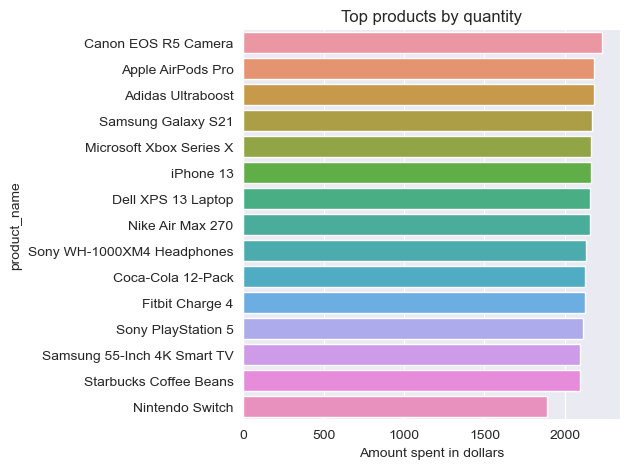

**Canon EOS R5 Camera** had the highest quantity of products sold with **2231** units while **Nintendo Switch** being the least had **1891** units

In [102]:
product_quantity = successful_orderdf.groupby('product_name')['quantity'].sum().sort_values(ascending = False).reset_index()
display(product_quantity)
sns.barplot(y ='product_name', x='quantity', data = product_quantity)
plt.title("Top products by quantity")
plt.xlabel("Amount spent in dollars")
plt.tight_layout()
plt.show()

printmd(f'**Canon EOS R5 Camera** had the highest quantity of products sold with **2231** units while **Nintendo Switch** being the least had **1891**\
 units')

### Insights Summmary

The overall purchase behavior shows a **right-skewed distribution** of order amounts, indicating that while many customers make smaller purchases, there are some who make significantly larger ones.
The **Canon EOS R5 Camera** is the highest-selling product with sales totaling **8,923,977.69** dollars, indicating its popularity and the potential for related product promotions.
Conversely, the **Coca-Cola 12-Pack** is the least selling product with **12,722.76** dollars in sales, suggesting lower demand for such items.

### The revenue for Successful orders and potential revenue that resulted into loss

In [106]:
### Successful orders includes the orders that checkout successfully
successful_orderdf = inc_df[(inc_df['status'] == 'success') & (inc_df['event_type'] == 'checkout')]
unsucessful_ordersdf = inc_df[(inc_df['status'] != 'success') & (inc_df['event_type'] != 'checkout')]

In [111]:
# revenue_df is the total revenue that was generated When orders are succesful and checked out
# potential_revenuedf is the revenue that could have been realised if orders were successful and are cheked out
revenue_df = round(successful_orderdf.order_amount.sum(),0)
potential_revenuedf = round(unsucessful_ordersdf.order_amount.sum(),0) 

print(revenue_df)
print(potential_revenuedf)

total_revenue = revenue_df + potential_revenuedf

revenue_percentage = round(revenue_df/total_revenue * 100,0)
potential_revenuedf = round(potential_revenuedf/total_revenue * 100,0)
display(revenue_percentage,potential_revenuedf)
print('\n')
printmd(f"From these insights, we can deduce that **successful transactions** account for only about **3%** of the total revenue, whereas \
**unsuccessful transactions** make up a staggering **97%**. This significant disparity highlights a major challenge in converting customer \
engagement into sales. Addressing this issue could unlock substantial revenue potential for Shop Smart Inc.")

22760347.0
775756970.0


3.0

97.0

From these insights, we can deduce that **successful transactions** account for only about **3%** of the total revenue, whereas **unsuccessful transactions** make up a staggering **97%**. This significant disparity highlights a major challenge in converting customer engagement into sales. Addressing this issue could unlock substantial revenue potential for Shop Smart Inc.